In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
# cell border experimental code: 

import numpy as np
from scipy.spatial import ConvexHull


In [16]:
df = pd.read_csv('data/cluster_position _Detailed.csv', skiprows=3)
df 

,Position X,Position Y,Position Z,Unit,Category,Collection,Time,ID,Unnamed: 8
0,49529.578,44229.441,1.116,µm,Surface,Position,1,0,NaN
1,49467.621,44290.391,0.977,µm,Surface,Position,1,1,NaN
2,49515.867,44246.172,0.776,µm,Surface,Position,1,2,NaN
3,49315.445,44443.277,2.803,µm,Surface,Position,1,3,NaN
4,49557.926,44204.316,2.187,µm,Surface,Position,1,4,NaN
...,...,...,...,...,...,...,...,...,...
20219,47583.918,41356.871,3.285,µm,Surface,Position,1,20219,NaN
20220,47669.691,41268.441,-1.012,µm,Surface,Position,1,20220,NaN
20221,47700.023,41240.758,0.904,µm,Surface,Position,1,20221,NaN
20222,47647.992,41296.988,0.550,µm,Surface,Position,1,20222,NaN


Best number of clusters detected: 10


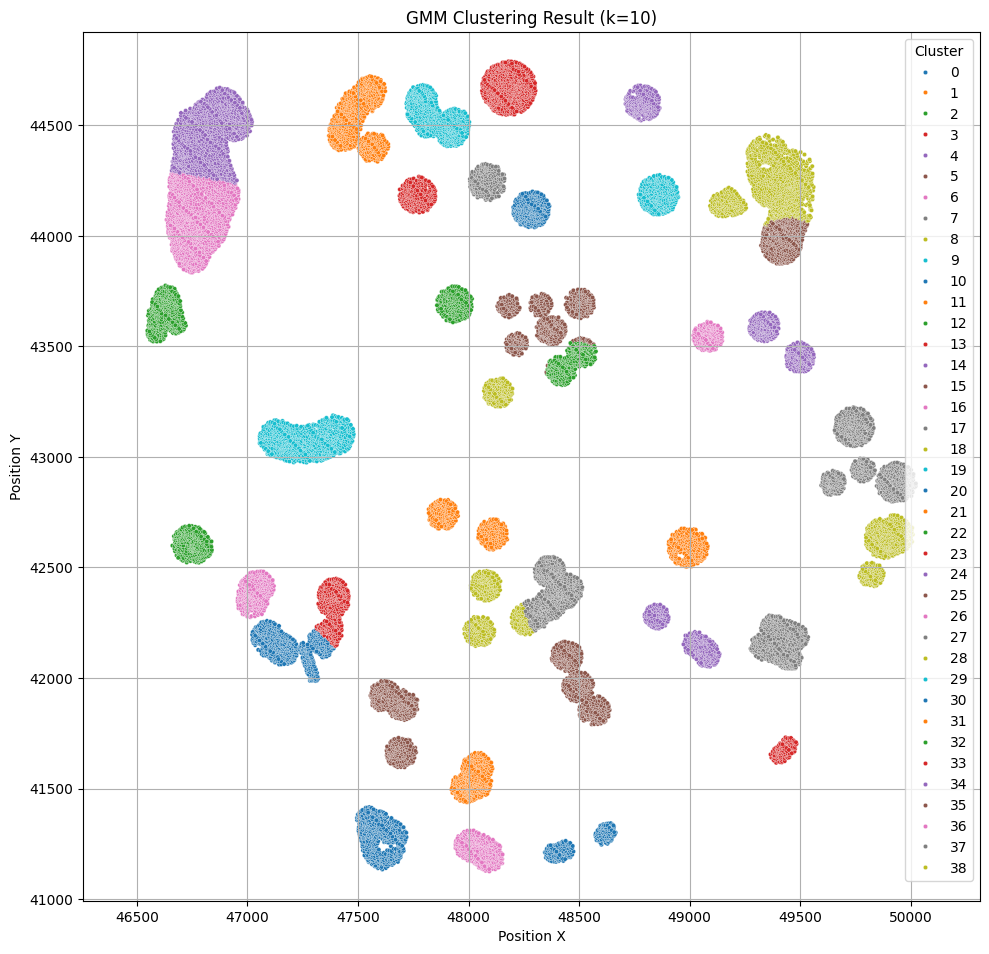

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Prepare data
X = df[['Position X', 'Position Y']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit GMMs with different number of clusters and compute BIC
bic_scores = []
models = []
for k in range(30, 40):
    gmm = GaussianMixture(n_components=k, covariance_type='spherical')
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    models.append(gmm)

# Step 3: Select best model (lowest BIC)
best_k = np.argmin(bic_scores) + 1
best_gmm = models[best_k - 1]
print(f"Best number of clusters detected: {best_k}")

# Step 4: Predict cluster labels
df['Cluster'] = best_gmm.predict(X_scaled)

# Step 5: Plot clusters
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Position X', y='Position Y', hue='Cluster', palette='tab10', s=10)
plt.title(f'GMM Clustering Result (k={best_k})')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.axis('equal')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


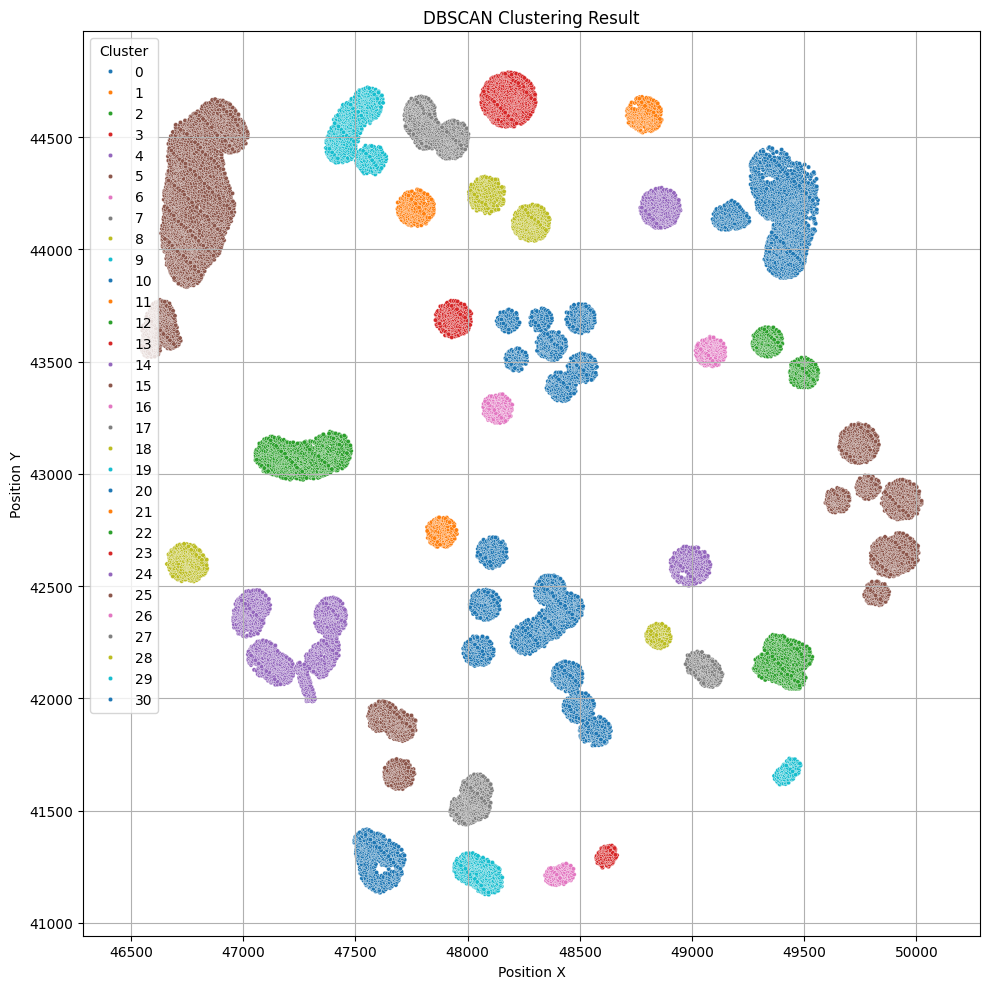

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Prepare data
X = df[['Position X', 'Position Y']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply DBSCAN
# You may need to tune eps and min_samples based on your dataset's density
db = DBSCAN(eps=0.1, min_samples=50)  # Default values to start
labels = db.fit_predict(X_scaled)

# Step 3: Attach cluster labels
df['Cluster'] = labels

# Step 4: Plot
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=df,
    x='Position X',
    y='Position Y',
    hue='Cluster',
    palette='tab10',
    s=10,
    legend='full'
)
plt.title('DBSCAN Clustering Result')
plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.axis('equal')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


/Users/patrick/Desktop2/lab_proj1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/patrick/Desktop2/lab_proj1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cluster label counts: {np.int64(0): np.int64(304), np.int64(1): np.int64(144), np.int64(2): np.int64(464), np.int64(3): np.int64(359), np.int64(4): np.int64(141), np.int64(5): np.int64(913), np.int64(6): np.int64(134), np.int64(7): np.int64(352), np.int64(8): np.int64(266), np.int64(9): np.int64(96), np.int64(10): np.int64(459), np.int64(11): np.int64(2590), np.int64(12): np.int64(242), np.int64(13): np.int64(211), np.int64(14): np.int64(346), np.int64(15): np.int64(114), np.int64(16): np.int64(222), np.int64(17): np.int64(197), np.int64(18): np.int64(208), np.int64(19): np.int64(1504), np.int64(20): np.int64(191), np.int64(21): np.int64(247), np.int64(22): np.int64(567), np.int64(23): np.int64(187), np.int64(24): np.int64(170), np.int64(25): np.int64(129), np.int64(26): np.int64(219), np.int64(27): np.int64(562), np.int64(28): np.int64(544), np.int64(29): np.int64(320), np.int64(30): np.int64(109), np.int64(31): np.int64(767), np.int64(32): np.int64(332), np.int64(33): np.int64(231), 

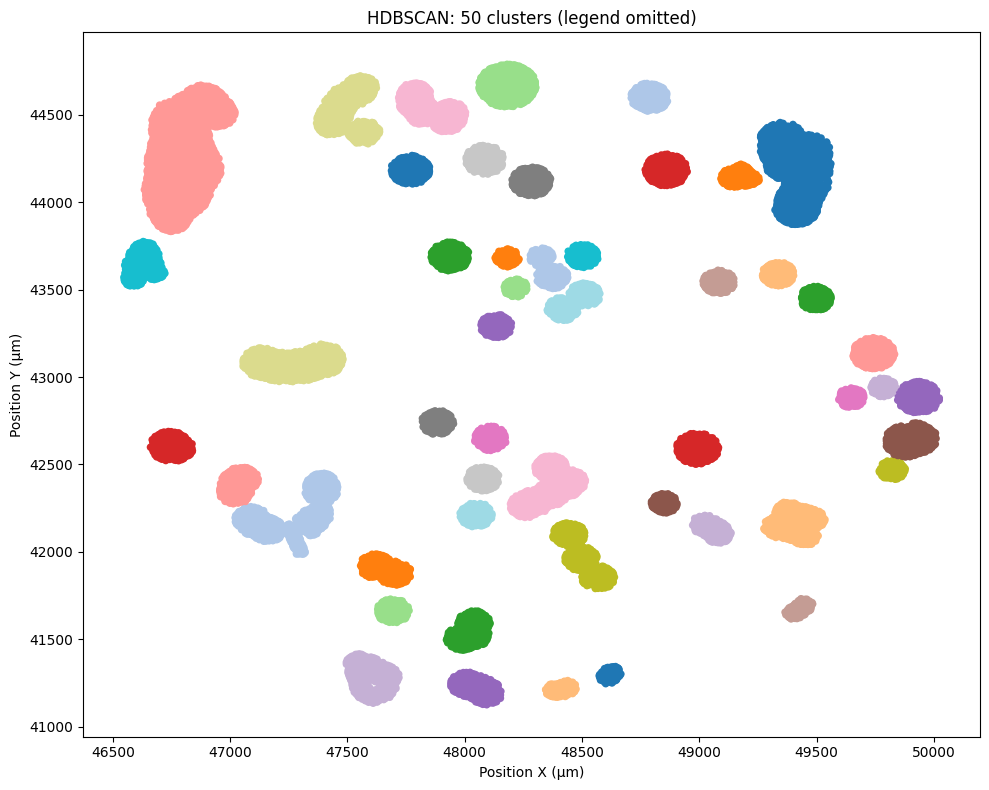

In [19]:
# 1) Install and import
import hdbscan
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Extract & scale your coordinates
coords = df[['Position X', 'Position Y']].values
coords_scaled = StandardScaler().fit_transform(coords)

# 3) Configure and run HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,    # smallest cluster you expect (in # of points)
    min_samples=5,          # how conservative core point definition is
    cluster_selection_epsilon=0.0  # 0 → let HDBSCAN pick flat clusters automatically
)
labels = clusterer.fit_predict(coords_scaled)

# 4) Inspect the result
unique_labels, counts = np.unique(labels, return_counts=True)
print("Cluster label counts:", dict(zip(unique_labels, counts)))
# -1 is noise; other integers are cluster IDs

# 5) Attach to your DataFrame
df['hdbscan_cluster'] = labels

# 6) Prepare for plotting
mask = labels != -1           # if you want to omit noise points
plot_coords = coords[mask]
plot_labels = labels[mask].astype(str)  # convert to string for seaborn

df_plot = pd.DataFrame(plot_coords, columns=['X', 'Y'])
df_plot['cluster'] = plot_labels

# 7) Plot (hiding legend if >10 clusters)
n_clusters = len([l for l in unique_labels if l != -1])

plt.figure(figsize=(10, 8))
if n_clusters > 10:
    sns.scatterplot(
        data=df_plot, x='X', y='Y',
        hue='cluster',
        palette='tab20',
        s=30, linewidth=0,
        legend=False
    )
    plt.title(f'HDBSCAN: {n_clusters} clusters (legend omitted)')
else:
    sns.scatterplot(
        data=df_plot, x='X', y='Y',
        hue='cluster',
        palette='tab10',
        s=30, linewidth=0,
        legend='full'
    )
    plt.legend(title='cluster', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title(f'HDBSCAN: {n_clusters} clusters')

plt.xlabel('Position X (µm)')
plt.ylabel('Position Y (µm)')
plt.tight_layout()
plt.show()


In [14]:
# Step 1: Rename df2 columns to match df
df2_renamed = df2.rename(columns={'x': 'Position X', 'y': 'Position Y'})

# Step 2: Merge on Position X and Position Y
merged_df = pd.merge(df, df2_renamed, on=['Position X', 'Position Y'], how='left')

# Step 3: Check result
merged_df.head()


,Position X,Position Y,Position Z,Unit,Category,Collection,Time,ID,Unnamed: 8,Cluster,NND,LD_50um
0,49529.578,44229.441,1.116,µm,Surface,Position,1,0,NaN,0,NaN,NaN
1,49467.621,44290.391,0.977,µm,Surface,Position,1,1,NaN,0,NaN,NaN
2,49515.867,44246.172,0.776,µm,Surface,Position,1,2,NaN,0,NaN,NaN
3,49315.445,44443.277,2.803,µm,Surface,Position,1,3,NaN,0,NaN,NaN
4,49557.926,44204.316,2.187,µm,Surface,Position,1,4,NaN,0,NaN,NaN
